In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
#library for calculating RMSE 
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel("/Volumes/GoogleDrive/My Drive/Data Science Eugene Pinsky/Homework_4/online_retail_from_kaggle.xlsx")

In [37]:
#code for plotting bar graph
def plot_bar_graph(df,x,y,color,title):

    fig= plt.figure(figsize =(8, 8))
    plt.bar(x,y,color=color)
    plt.title(title)
    plt.xlabel("Leading digit")
    plt.ylabel("Frequency")
    plt.xticks(range(0,10,1))
    plt.show()

Real Distribution F is computed below:

In [13]:
#ignoring products with price starting at zero by considering prices starting at 1
df = df[df["Price"] >= 1.0 ]
df = df.reset_index(drop=True)
#making a new column called leading digit which stores the same.
df["Leading Digit"] = df["Price"].astype(str).str[:1] 
df_frequency = pd.DataFrame()
df_frequency = df["Leading Digit"].value_counts()
df_frequency = df_frequency.to_frame()
df_frequency= df_frequency.reset_index()
df_frequency = df_frequency.sort_values(by=["index"],ignore_index=True)
df_frequency = df_frequency.rename(columns={"index":"Leading Digit","Leading Digit":"Frequency"})
total_freq_sum = df_frequency["Frequency"].sum()
df_frequency["Percentage of Occurence"] = (df_frequency["Frequency"]/ total_freq_sum) * 100
df_frequency

,Leading Digit,Frequency,Percentage of Occurence
0,1,169831,39.856608
1,2,102324,24.013799
2,3,41130,9.652550
3,4,39972,9.380786
4,5,25450,5.972706
5,6,12092,2.837798
6,7,16206,3.803288
7,8,12317,2.890602
8,9,6783,1.591861


Model 1: Equal weight distribution P is computed below: 

In [14]:
df_model_1 = pd.DataFrame({"Leading Digit":[1,2,3,4,5,6,7,8,9]})
df_model_1["Percentage of Occurence"] = (1/9)*100
df_model_1

,Leading Digit,Percentage of Occurence
0,1,11.111111
1,2,11.111111
2,3,11.111111
3,4,11.111111
4,5,11.111111
5,6,11.111111
6,7,11.111111
7,8,11.111111
8,9,11.111111


Model 2: Based on Bernford's law Pi is computed below:

In [19]:
df_model_2 = pd.DataFrame({"Leading Digit":[1,2,3,4,5,6,7,8,9]})
df_model_2["Percentage of Occurence"] = 0.0

for ind,i in zip(df_model_2.index,df_model_2["Leading Digit"]):

    #print(type(df_model_2.loc[ind,"Leading Digit"]))
    df_model_2["Percentage of Occurence"][ind] =   math.log10(1+(1/df_model_2["Leading Digit"][ind])) 
    df_model_2["Percentage of Occurence"][ind] = df_model_2["Percentage of Occurence"][ind] * 100    

df_model_2

,Leading Digit,Percentage of Occurence
0,1,30.103000
1,2,17.609126
2,3,12.493874
3,4,9.691001
4,5,7.918125
5,6,6.694679
6,7,5.799195
7,8,5.115252
8,9,4.575749


Question 1.

Histogram for Real Distribution (F).

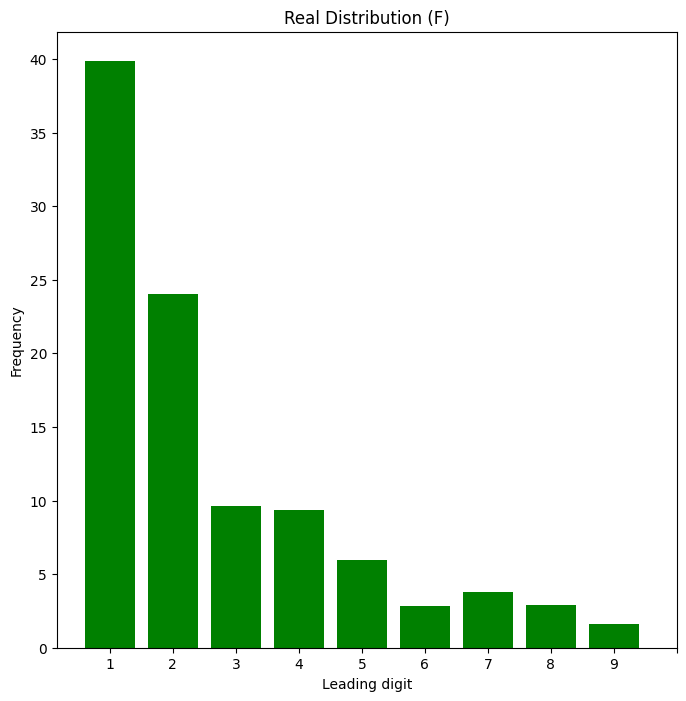

In [38]:
plot_bar_graph(df_frequency,df_frequency["Leading Digit"],df_frequency["Percentage of Occurence"],"green","Real Distribution (F)")

Histogram for Equal weight Distribution (P).

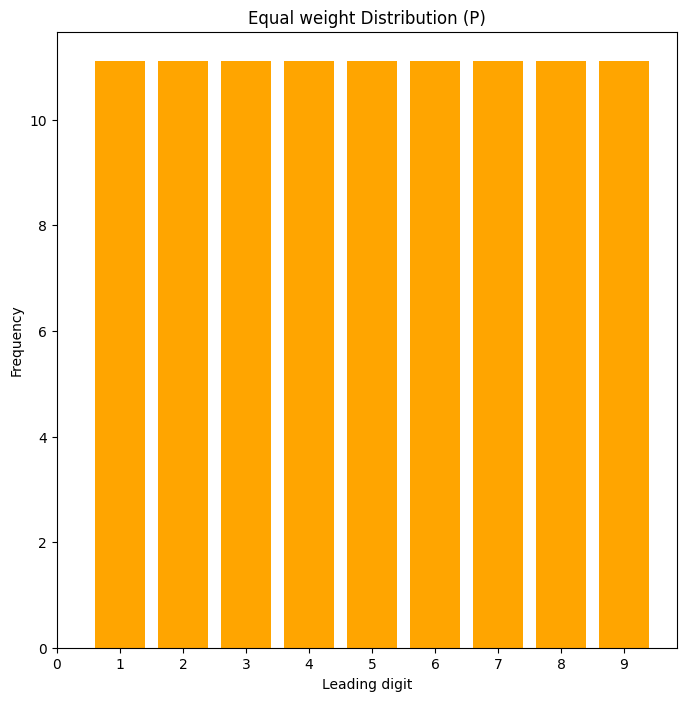

In [39]:
plot_bar_graph(df_model_1,df_model_1["Leading Digit"],df_model_1["Percentage of Occurence"],"orange","Equal weight Distribution (P)")

Histogram for Bernford law model (Pi).

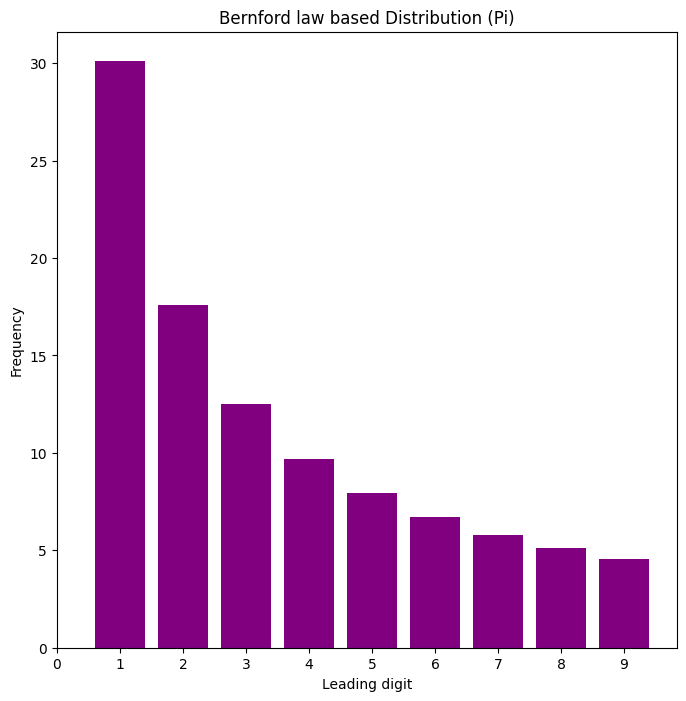

In [40]:
plot_bar_graph(df_model_2,df_model_2["Leading Digit"],df_model_2["Percentage of Occurence"],"purple","Bernford law based Distribution (Pi)")

Question 2.

Helper functions for question 2.

In [47]:
def relative_error_calculator(df_actual,df_predicted):
    #creating a dataframe that stores relative error between real model and various given models
    df_relative_errors = pd.DataFrame({"Leading Digit":[1,2,3,4,5,6,7,8,9]})
    df_relative_errors["Error in Model"] = 0.0
    
    #iteratively computing relative error between real and predicted models values
    for ind in df_relative_errors.index:

        df_relative_errors["Error in Model"][ind] = abs((df_actual[ind] - df_predicted[ind]) / df_actual[ind])

    return df_relative_errors

In [55]:
#code for plotting bar graph
def plot_bar_graph_2(df,x,y,color,title):

    fig= plt.figure(figsize =(8, 8))
    plt.bar(x,y,color=color)
    plt.title(title)
    plt.xlabel("Leading digit")
    plt.ylabel("Error in Model")
    plt.xticks(range(0,10,1))
    plt.show()

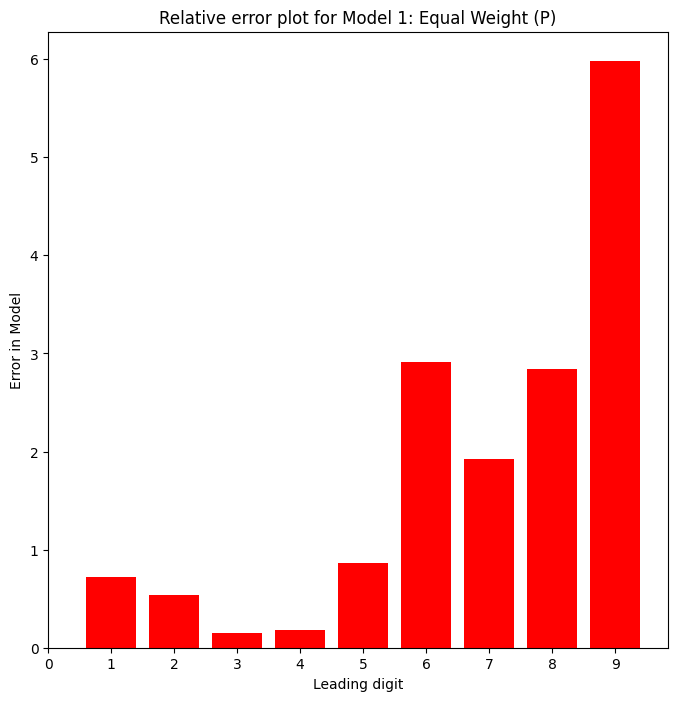

In [58]:
#computing relative error using helper function
error = relative_error_calculator(df_frequency["Percentage of Occurence"],df_model_1["Percentage of Occurence"])
#plotting relative error plot across each leading digit
plot_bar_graph_2(error,error["Leading Digit"],error["Error in Model"],"red","Relative error plot for Model 1: Equal Weight (P)")

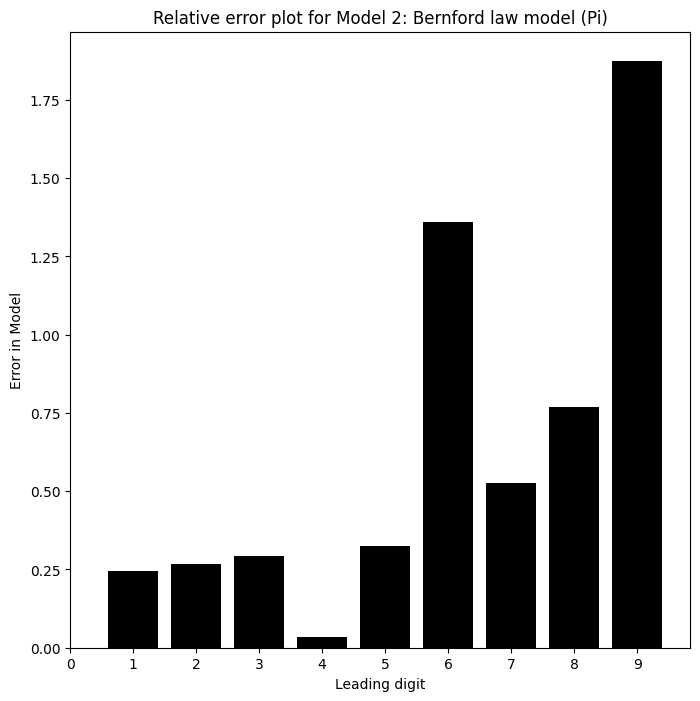

In [59]:
error = relative_error_calculator(df_frequency["Percentage of Occurence"],df_model_2["Percentage of Occurence"])
plot_bar_graph_2(error,error["Leading Digit"],error["Error in Model"],"black","Relative error plot for Model 2: Bernford law model (Pi)")

Question 3.

In [63]:
def root_mean_square_calculator(actual,predicted,model_name):
    RMSE = round(math.sqrt(mean_squared_error(actual,predicted)),2)
    print("The root mean squared error for the "+model_name+" is: "+str(RMSE))

In [64]:
root_mean_square_calculator(df_frequency["Percentage of Occurence"].values,df_model_1["Percentage of Occurence"].values,"Equal weight model (P)")

The root mean squared error for the Equal weight model (P) is: 12.04


In [65]:
root_mean_square_calculator(df_frequency["Percentage of Occurence"].values,df_model_2["Percentage of Occurence"].values,"Bernford law model (Pi)")

The root mean squared error for the Bernford law model (Pi) is: 4.48


Question 4.

In [71]:
def country_retail_data(df,country):

    data = df[df["Country"] == country]
    data = data["Leading Digit"].value_counts()
    data = data.to_frame()
    data = data.reset_index()
    data = data.rename(columns={"index":"Leading Digit","Leading Digit":"Frequency"})
    data = data.sort_values(by="Leading Digit",ignore_index=True)
    total_freq = data["Frequency"].sum() 
    data["Percentage of Occurence"] = (data["Frequency"]/total_freq)*100

    return data

a.

United Arab Emirates

In [72]:
UAE = country_retail_data(df,"United Arab Emirates")
UAE

,Leading Digit,Frequency,Percentage of Occurence
0,1,145,48.821549
1,2,90,30.303030
2,3,19,6.397306
3,4,24,8.080808
4,5,8,2.693603
5,6,3,1.010101
6,7,5,1.683502
7,8,3,1.010101


United Arab Emirates is missing 9 as a leading digit for its prices, so we will add a row for this that indicates that there is zero occurence of this digit.

In [76]:
#appending zero occurence for digit 9 in prices for UAE
UAE.loc[8] = ['9','0','0.0'] 
UAE 

,Leading Digit,Frequency,Percentage of Occurence
0,1,145,48.821549
1,2,90,30.30303
2,3,19,6.397306
3,4,24,8.080808
4,5,8,2.693603
5,6,3,1.010101
6,7,5,1.683502
7,8,3,1.010101
8,9,0,0.0


United Kingdom

In [73]:
UK = country_retail_data(df,"United Kingdom")
UK

,Leading Digit,Frequency,Percentage of Occurence
0,1,156056,39.470975
1,2,95089,24.050697
2,3,38567,9.754685
3,4,37297,9.433466
4,5,24251,6.133764
5,6,11356,2.872254
6,7,15152,3.832369
7,8,11500,2.908675
8,9,6101,1.543115


Japan

In [74]:
JAP = country_retail_data(df,"Japan")
JAP

,Leading Digit,Frequency,Percentage of Occurence
0,1,90,51.428571
1,2,69,39.428571
2,3,4,2.285714
3,4,8,4.571429
4,5,1,0.571429
5,6,1,0.571429
6,7,2,1.142857


Japan is missing 8 and 9 as leading digits for its prices, so we will add rows for this that indicates that there is zero occurence of these digit(s).

In [78]:
#appending zero occurence for digit 8 in prices for Japan.
JAP.loc[7] = ['8','0','0.0']
#appending zero occurence for digit 9 in prices for Japan
JAP.loc[8] = ['9','0','0.0']  
JAP

,Leading Digit,Frequency,Percentage of Occurence
0,1,90,51.428571
1,2,69,39.428571
2,3,4,2.285714
3,4,8,4.571429
4,5,1,0.571429
5,6,1,0.571429
6,7,2,1.142857
7,8,0,0.0
8,9,0,0.0


b.

In [79]:
root_mean_square_calculator(UAE["Percentage of Occurence"].values,df_model_1["Percentage of Occurence"],"Equal weight model (P) for United Arab Emirates ")

The root mean squared error for the Equal weight model (P) for United Arab Emirates  is: 16.02


In [83]:
root_mean_square_calculator(UK["Percentage of Occurence"].values,df_model_1["Percentage of Occurence"],"Equal weight model (P) for United Kingdom ")

The root mean squared error for the Equal weight model (P) for United Kingdom  is: 11.93


In [82]:
root_mean_square_calculator(JAP["Percentage of Occurence"].values,df_model_1["Percentage of Occurence"],"Equal weight model (P) for Japan ")

The root mean squared error for the Equal weight model (P) for Japan  is: 18.61
